In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

### t-test vs. paired t-test

In [2]:
# df = len(tmpA)-1

# ## t-test
# print(scipy.stats.ttest_ind(tmpB,tmpA))
# de = np.mean(tmpA)-np.mean(tmpB)
# nu = np.sqrt(np.var(tmpA)/df+np.var(tmpB)/df)
# print(de/nu)
# ## paired t-test
# print(scipy.stats.ttest_rel(tmpB,tmpA))
# diff = [a-b for a,b in zip(tmpA,tmpB)]
# de = np.mean(diff)
# nu = np.std(diff)/np.sqrt(df)
# print(de/nu)

### P-value
P 값은 어떤 통계량보다 더 극단적이거나 같은 값을 얻을 수 있을 '확률'을 의미한다(${}^{1)}$A p-value is the probability that random chance generated the data, ${}^{2)}$or something else that is equal ${}^{3)}$or rarer.). 여기서 이 '확률'이라는 부분에 대해서 많은 오해가 발생하는데, 이 부분을 자세히 살펴보기 위해서 위 문장을 다음과 같이 3가지로 구분지어서 살펴보자.\
1) A p-value is the probabilit that random chance generated the data\
2) or something else that is equal\
3) or rarer\
예를 들어, 동전을 두 번 던졌을 때 HH가 나올 '확률'과 'p-value'를 구해보자.
* probability :\
HH가 나올 확률 = 1/4 = 0.25
* p-value :\
1) HH가 나올 확률 = 1/4 = 0.25\
2) HH와 같은 확률로 얻을 결과물, TT = 1/4 = 0.25\
3) HH보다 드물게 나오는 결과물, ? = 0\
$\therefore p=0.25+0.25=0.5$

이와 같이 'HH의 확률'과 'HH의 p-value'는 엄밀하게는 다른 의미라는 것을 구분해야 한다.

마찬가지로 동전을 5번 던졌을 때, 4앞, 1뒤인 경우의 p-values는 아래와 같다.
\begin{align}
p=\underset{(1)}{\Pr(\text{4 heads and 1 tails})}+\underset{(2)}{\Pr(\text{1 heads and 4 tails})}+\underset{(3)}{\underline{\Pr(\text{5 heads})+\Pr(\text{5 tailes})}}=\frac{5+5+1+1}{32}=\frac{3}{8}=0.375
\end{align}

동전 던지기와 같은 이산적인 표본 값이 아닌, 키와 몸무게 같은 연속적인 표본 값인 경우에는 어떨까?\
이때는 이 표본 값들이 정규분포를 따르는 모집단에서 추출했다는 가정 하에, 연속적인 density function $f(x)$ 을 생각하면 간단하게 해결된다. 이때 변량 $a\le x\le b$ 의 확률은 다음과 같으며, 이는 아래 그림에서 $\color{blue}{\text{우측 파란색 영역}}$에 해당한다.
\begin{align}
\Pr(a\le x\le b)=\int_{a}^{b}{f(x)dx}
\end{align}

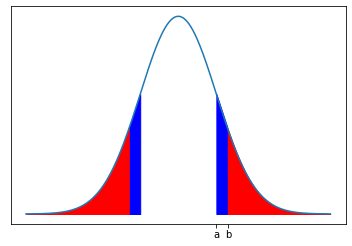

In [49]:
temp = scipy.stats.norm(loc=0, scale=10)
x=np.arange(-40,40,.1)
ab = np.array([10.,13.])
plt.plot(x,temp.pdf(x))
plt.text(ab[0], -0.004, 'a', horizontalalignment='center', verticalalignment='center')
plt.text(ab[1], -0.004, 'b', horizontalalignment='center', verticalalignment='center')
plt.xticks(ab, size=0)
plt.yticks([])
plt.fill_between(ab, 0., temp.pdf(ab), color='b')
plt.fill_between(-ab, 0., temp.pdf(-ab), color='b')
ext = np.arange(ab[1],x[-1],.1)
plt.fill_between(ext, 0., temp.pdf(ext), color='r')
plt.fill_between(-ext, 0., temp.pdf(-ext), color='r')

이제 $a\le x\le b$ 의 p-value 를 구해보면 아래와 같은 결론을 얻을 수 있다.
\begin{align}
p=\color{blue}{\text{blue areas}}+\color{red}{\text{red areas}}
\end{align}

### T-test

임의의 두 표본집단이 있다. 이 두 집단이 차이가 있는지(모집단이 다른지)를 판단하는 좋은 방법은 무엇일까?
두 집단이 명백히 정규분포를 따르며, 적당한 평균의 차이와 산포도를 가지고 있으면 서로 다른 모집단으로부터 유래됐다는 것을 쉽사리 짐작할 수 있을 것이다. 아래의 그림을 보자.

(-20.0, 60.0)

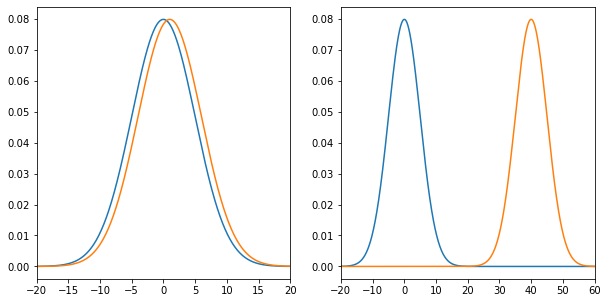

In [2]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
normA = scipy.stats.norm(loc=0, scale=5)
normB = scipy.stats.norm(loc=1, scale=5)
normC = scipy.stats.norm(loc=40, scale=5)
x=np.arange(-20,60,.1)
axs[0].plot(x,normA.pdf(x), x,normB.pdf(x))
axs[0].set_xlim(-20,20)
axs[1].plot(x,normA.pdf(x), x,normC.pdf(x))
axs[1].set_xlim(-20,60)

왼쪽과 오른쪽은 두 집단의 분포를 예시로 나타낸 그림이다. 왼쪽 그림에서 두 집단의 차이는 미미하여 서로 다른 집단이라 판단하기 애매하다고 볼 수 있으나, 오른쪽 그림에서는 두 집단의 차이가 유의미(significant)하다. 그렇다면 이 중간의 상황에서는 어떻게 판단해야할까?

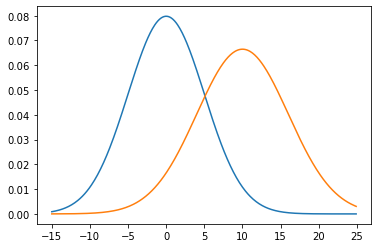

In [3]:
normA = scipy.stats.norm(loc=0, scale=5)
normB = scipy.stats.norm(loc=10, scale=6)
x=np.arange(-15,25,.1)
plt.plot(x,normA.pdf(x), x,normB.pdf(x))

여기서 두 표본집단의 차이가 다름을 직접적으로 증명하는 것은 일반적으로 어렵다. 그러니 두 표본집단의 차이가 없음을 가정하고, 그것을 부정하는 논리로 진행하는 것이 상대적으로 편리한 방법이 될 것이다. 표본집단 $X=\{ X_{1},X_{2},\cdots,X_{n}\} $ 로 부터 얻은 통계값으로 모집단의 특성을 예측하는 기본적인 방법은 다음과 같다.
\begin{gather}
\mu = \bar{X}\\
V = \frac{1}{n-1}\sum_{i}^{n}(X_{i}-\bar{X})^{2}\\
\sigma = \sqrt{V}
\end{gather}

#### proof)
1) 표본집단의 평균 $\bar{X}$ 표본추출을 할 때마다 달라진다. 그러니 $\bar{X}$ 가 아니더라도, 평균 $m$ 을 정의하여, 이로부터 모집단의 평균 $\mu$ 를 추정하기 위해서는 $m$ 의 기댓값 $E[m]$ 이 $\mu$ 가 되도록 정의하는 것이 합당하다. 즉, $E[m]=\mu$ 가 되도록 $m$ 을 정의하자. 그러기 위하여 일단 $E[\bar{X}]$ 를 먼저 살펴보면,
\begin{align}
E[\bar{X}] &= E\Big[\frac{X_{1}+X_{2}+\cdots+X_{n}}{n}\Big] = \frac{1}{n}E\big[ X_{1}+X_{2}+\cdots+X_{n} \big]\\
&=\frac{1}{n}\Big(E[X_{1}] + E[X_{2}] + \cdots + E[X_{n}]\Big)\\
&=\frac{1}{n}\big(\mu+\mu+\cdots+\mu\big)=\frac{n\mu}{n} = \mu
\end{align}
$E[\bar{X}]$ 이 모집단의 평균 $\mu$ 와 일치하므로, $m=\bar{X}$ 로 정의하는 것으로 충분하다.

2) 모집단의 분산 $\sigma^2$ 을 얻기 위해서 표본집단의 분산 $s^2$ 를 정의해야한다. 이것은 위와 마찬가지로 $E[s^2]=\sigma^2$ 가 되는 $s^2$ 를 정의하면 될 것이다. 그러기 위해서 먼저 $s^2=V[X]$ 라 가정하고 $E\big[V[X]\big]$ 를 살펴보자.
\begin{align}
E\big[V[X]\big] &= E\Big[\frac{1}{n}\sum_{i}^{n}(X_i-\bar{X})^2\Big]\\
&= \frac{1}{n}E\Big[\sum_{i}^{n}(X_i-m+m-\bar{X})^2\Big]\\
&= \frac{1}{n}E\Big[\sum_{i}^{n}\big\{(X_i-m)^2+2(X_i-m)(\bar{X}-m)+(m-\bar{X})^2\big\}\Big]\\
&= \frac{1}{n}E\Big[\sum_{i}^{n}(X_i-m)^2+2(m-\bar{X})\sum_{i}^{n}(X_i-m)+\sum_{i}^{n}(m-\bar{X})^2\Big]\\
&= \frac{1}{n}E\Big[\sum_{i}^{n}(X_i-m)^2-2(\bar{X}-m)\cdot n(\bar{X}-m)+n(m-\bar{X})^2\Big]\\
&= \frac{1}{n}E\Big[\sum_{i}^{n}(X_i-m)^2-n(\bar{X}-m)^2\Big] = \frac{1}{n}\Big(\sum_{i}^{n}V[X_i]-nV[\bar{X}]\Big)\\
& = \frac{1}{n}\big(\sum_{i}^{n}\sigma^2-n\cdot \frac{\sigma^2}{n}\big) = \frac{n-1}{n}\sigma^2
\end{align}
cf) $V[\bar{X}]=V\big[\frac{1}{n}(X_1+X_2\cdots+X_n)\big]=\frac{1}{n^2}\big(V[X_1]+V[X_2]+\cdots+V[X_n]\big)=\frac{1}{n^2}\big(\sigma^2+\sigma^2+\cdots+\sigma^2\big)=\frac{\sigma^2}{n}$



이 두 표본집단으로부터 검정 통계량(예, t값)을 얻었다고 해보자.

A: mu = -0.31, sd = 10.01
B: mu = 1.82, sd = 10.02
t = -2.13/0.45 = -4.75

A: mu = 0.13, sd = 9.69
B: mu = 1.89, sd = 10.13
t = -1.76/0.44 = -3.98

A: mu = -0.20, sd = 10.25
B: mu = 2.31, sd = 9.86
t = -2.51/0.45 = -5.58

A: mu = 0.24, sd = 9.88
B: mu = 1.98, sd = 9.71
t = -1.74/0.44 = -3.97

A: mu = -0.55, sd = 9.98
B: mu = 1.60, sd = 9.86
t = -2.15/0.44 = -4.84



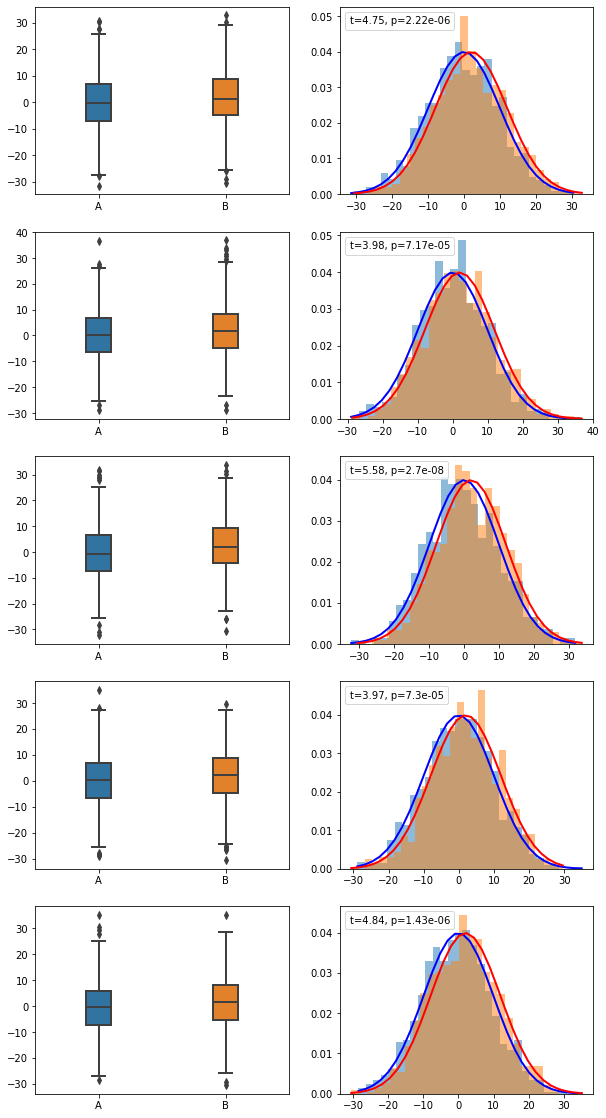

In [10]:
## population
mu_A, sd_A = 0, 10
mu_B, sd_B = 2, 10
n = 1000

nrows=5
fig, axs = plt.subplots(nrows=nrows,ncols=2,figsize=(10,20))
for i in range(nrows):
    ## np.random.nomral 함수를 이용해서 평균 mu, 표준편차 sd 인 sample들을 n 개 추출한다.
    tmpA = np.random.normal(loc=mu_A, scale=sd_B, size=n)
    tmpB = np.random.normal(loc=mu_B, scale=sd_B, size=n)
    print("A: mu = %.2f, sd = %.2f"%(np.mean(tmpA),np.std(tmpA)))
    print("B: mu = %.2f, sd = %.2f"%(np.mean(tmpB),np.std(tmpB)))
    ## t-test
    df = n-1
    tval, pval = scipy.stats.ttest_ind(tmpB,tmpA)
    de = np.mean(tmpA)-np.mean(tmpB)
    nu = np.sqrt(np.var(tmpA)/df+np.var(tmpB)/df)
    print("t = %.2f/%.2f = %.2f\n"%(de,nu,de/nu))

    df = pd.DataFrame({'A':tmpA, 'B':tmpB})
#     sns.swarmplot(data=df, size=5, color='#F23A29', ax=axs[i,0])
    sns.boxplot(data=df, linewidth=2, width=.2, ax=axs[i,0])

    ## sample들의 historgram을 출력한다.
    count, bins_A, _ = axs[i,1].hist(tmpA, bins=30, alpha=0.5, histtype='bar', density=True)
    count, bins_B, _ = axs[i,1].hist(tmpB, bins=30, alpha=0.5, histtype='bar', density=True)
    # sample들을 이용해서 Gaussian Distribution의 shape을 재구축해서 line으로 그린다.
#     bins = np.array(sorted(np.concatenate([bins_A,bins_B])))
    axs[i,1].plot(bins_A, 1/(sd_A * np.sqrt(2 * np.pi)) * np.exp( - (bins_A - mu_A)**2 / (2 * sd_A**2) ), linewidth=2, color='b')
    axs[i,1].plot(bins_B, 1/(sd_B * np.sqrt(2 * np.pi)) * np.exp( - (bins_B - mu_B)**2 / (2 * sd_B**2) ), linewidth=2, color='r')
    axs[i,1].legend(loc='upper left', labels=['t=%.2f, p=%.3g'%(tval,pval)], handletextpad=0.1, handlelength=0.)
    

### ANOVA
The P value is the answer to two equivalent questions:\
$\cdot$ If the null hypothesis were true, what is the chance that random sampling would result in a difference this large or larger?\
$\cdot$ What is the smallest definition of the threshold (alpha) of statistical significance at which this result would be statistically significant?